# Implementing a Binary, Three-Layer NN in PyTorch

Names and partners:

Sayemum Hassan

First we'll create a dataset that is non-linearly seperable, and thus requires a hidden layer.

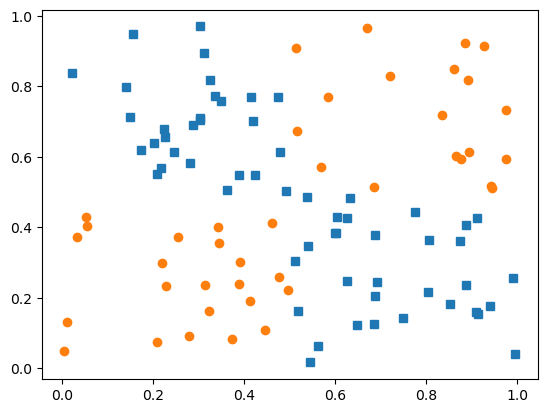

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt


def noisy_xor(num_points):
    """Synthetic 2d Dataset that is not linearly separable."""
    features = np.random.randint(2, size=(num_points, 2))
    labels = np.array(np.logical_xor(features[:, 0], features[:, 1]), dtype=np.float32)
    labels = np.expand_dims(labels, 1)
    features = np.array(
        (features + (np.random.random(features.shape))) / 2.0,
        dtype=np.float32,
    )
    return features, labels


train_size = 100
X, y = noisy_xor(train_size)

# Plot the dataset
plt.plot(X[y[:, 0] == 1, 0], X[y[:, 0] == 1, 1], "s")
plt.plot(X[y[:, 0] == 0, 0], X[y[:, 0] == 0, 1], "o")
plt.show()

# Convert to tensors
X = torch.tensor(X)
y = torch.tensor(y)


## Neural Network Review

Recall our illustration of a simple three-layer neural network:

![Three Layer Network](nn_three.svg)

The activation at the hidden layer can be expressed as:

$h(\mathbf{x}^\textsf{T} \mathbf{W}^{(1)} + \mathbf{b}^{(1)})$

In this example $h$ is the elementwise nonlinear function applied at the hidden layer, $\mathbf{W}^{(1)}$ is a $4\times 5$ weight matrix and $\mathbf{b}^{(1)}$ is a $1\times 5$ row vector containing the bias weights. (The bias weights are not shown in the image.)

The final output of the network can be expressed as follows:

$\sigma\left( \color{gray} h(\mathbf{x}^\textsf{T} \mathbf{W}^{(1)} + \mathbf{b}^{(1)})\color{black} \mathbf{W}^{(2)} + b^{(2)}\right)$

Where $\sigma$ is the logistic function, $\mathbf{W}^{(2)}$ is a $5\times 1$ weight matrix and $\mathbf{b}^{(2)}$ is a scalar representing the bias weight of the output unit.

Here are some utility functions for calculating the two non-linearities and the cross-entropy loss:


In [8]:
def binary_cross_entropy_loss(pred, labels):
    return -torch.sum(labels * torch.log(pred) + (1.0 - labels) * torch.log(1.0 - pred))


def logistic(a):
    return 1.0 / (1.0 + torch.exp(-a))


def relu(a):
    return torch.max(a, torch.zeros_like(a))

In [9]:
# NOW CREATE THE PARAMETERS FOR OUR NETWORK
num_hidden = 5
W1 = torch.randn((2, num_hidden), requires_grad=True)
b1 = torch.randn((num_hidden,), requires_grad=True)
W2 = torch.randn((num_hidden, 1), requires_grad=True)
b2 = torch.randn((1,), requires_grad=True)

params = [W1, b1, W2, b2]

In the cell below, complete the unfinished `forward` function and add code to train the resulting network.  Some advice:
* I suggest a nested training loop, where the out loop iterates over the epochs, and the inner loop iterates over the individual samples. For this simple implementation we'll perform a weight update after each sample.
* Start with a learning rate around .01
* You may want a helper method named someing like `opt` or `sgd` that will take the list of parameters and update them based on their gradients.
* Don't forget to `.zero_()` the gradients after each udpate.


In [23]:
"""HONOR CODE NOTES:
I asked ChatGPT to create the sgd helper function and help me correct my nested training loop when I had it incorrect the first time I attempted it.
"""

def sgd(params, l_rate):
    """Perform one round of stochastic gradient descent and update the parameters"""
    with torch.no_grad():
        for param in params:
            param -= l_rate * param.grad
            param.grad.zero_()


def forward(x, W1, b1, W2, b2):
    """Complete a forward pass through the network for input x."""
    # YOUR CODE HERE
    hidden = relu(x @ W1 + b1)
    output = logistic(hidden @ W2 + b2)
    return output


# Code for training the network.

# YOUR CODE HERE
learning_rate = .01  # ADJUST THIS!
iterations = 300      # AND/OR THIS!


for iteration in range(iterations):
    for i in range(train_size):
        y_pred = forward(X[i], W1, b1, W2, b2)

        loss = binary_cross_entropy_loss(y_pred, y[i])

        loss.backward()

        sgd(params, learning_rate)
        

In [22]:
# Testing Code

test_size = 100
X_test, y_test = noisy_xor(test_size)
X_test = torch.tensor(X_test)
y_test = torch.tensor(y_test)

correct = 0
for i in range(test_size):
    if torch.round(y_test[i, 0]) == torch.round(forward(X_test[i, :], W1, b1, W2, b2)):
        correct += 1

print("ACCURACY", correct / test_size)
assert correct / test_size > .8

ACCURACY 0.86
